# Algorithms

In [1]:
#@title Imports and Functions
import matplotlib.pyplot as plt
import numpy as np
# from scipy.interpolate import make_interp_spline
import pandas as pd
# from IPython.display import IFrame
import networkx as nx
import pydot
import pylab
from networkx.drawing.nx_pydot import graphviz_layout
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import textwrap


if 'global_nodes' not in globals():
  global global_nodes
  global_nodes = {1: "ML4T", 2: "AI4R", 3: "ML", 4: "Ethics", 5:"DVA", 6: "SDP"}

def create_and_plot_graph(nodes, edges, figsize=(15,8), export_filename=None, save_data=False, add_to_global=False):

  # # Wrap node labels to fit in graph nodes - replace all space with \n
  for key, value in nodes.items():
    nodes[key] = textwrap.fill(
        value, width=round(np.sqrt(len(value))*2), initial_indent='', subsequent_indent='', expand_tabs=True,
        replace_whitespace=True, fix_sentence_endings=False, break_long_words=False,
        drop_whitespace=True, break_on_hyphens=False, tabsize=8, max_lines=None, placeholder=' [...]')

  # auto generated edges
  node_list = list(nodes.keys())
  for i in node_list:
    j = 10*i + 1
    while j in node_list:
      edges.append([i, j])
      j+=1

  # Create graph
  T = nx.DiGraph(overlap=False)

  # Add edges to graph with color according to node label lengths
  node_label_lengths = []
  for edge in edges:
    T.add_edge(nodes[edge[0]], nodes[edge[1]])
    # node_label_lengths.append(min(len(str(edge[0])), len(str(edge[1]))))
    node_label_lengths.append(len(str(edge[0])))

  cm = pylab.get_cmap('copper')
  # colors = [cm(1.*(i-min(node_label_lengths))/max(1,(max(node_label_lengths)-min(node_label_lengths)))) for i in node_label_lengths]
  colors = [cm(i/max(node_label_lengths)) for i in node_label_lengths]

  plt.figure(figsize=figsize)

  # Set graph visualization type
  pos = graphviz_layout(T, prog="neato") # dot, twopi, fdp, sfdp, circo, neato
  # pos = nx.kamada_kawai_layout(T)
  # pos = nx.spring_layout(T)

  # Set options
  options = {# "edge_color": "#C5C6D0", "font_color": "black",  "alpha": 0.5, 'edge_cmap': 'plasma'
            "font_size": 10, 'font_color': 'black', "node_shape": "s", "node_color": "None", 'arrowstyle': 'wedge',
             "edgecolors": "None", "linewidths": 0.2, "width": 0.5, "node_size": 1500, 'arrowsize':15, "edge_color": colors,
             'bbox': dict(facecolor="white", edgecolor='black', boxstyle='round, pad=0.1',linewidth=0.1, alpha=0.2)
            }

  g = nx.draw(T, pos, with_labels=True, **options)

  # Added functionality
  if export_filename == None:
    plt.show()
  else:
    plt.savefig(export_filename, dpi=300)

  if save_data:
    data = {'id':nodes.keys(), 'name':nodes.values()}
    nodes_df = pd.DataFrame(data)
    nodes_df.to_csv('nodes_df.csv')
    data = {'source':[i[0] for i in edges],
            'target':[i[1] for i in edges]}
    edges_df = pd.DataFrame(data)
    edges_df.to_csv('edges_df.csv')
  if add_to_global:
    # Find the key of value of first node in global
    first_value_local = list(nodes.values())[0]
    try:
      key_match_global = str(list(global_nodes.keys())[list(global_nodes.values()).index(first_value_local)])
      msg = "Added to existing branch in global"
      for key, value in nodes.items():
        global_nodes[int(key_match_global + str(key)[1:])] = value
    except:
      msg = "Did not find existing branch in global to attach"

    return msg

ModuleNotFoundError: No module named 'matplotlib'

'Did not find existing branch in global to attach'

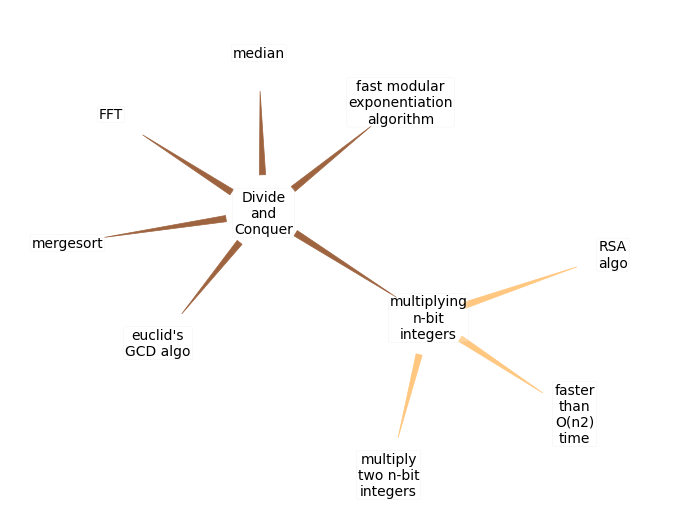

In [2]:
#@title Divide and Conquer { vertical-output: true}
nodes = {   # write the nodes for graph to a csv file
            1: 'Divide and Conquer',
            11: 'fast modular exponentiation algorithm',
            12: "euclid's GCD algo",
            13: 'multiplying n-bit integers',
            131: 'RSA algo',
            132: 'multiply two n-bit integers',
            133: 'faster than O(n2) time',
            14: 'median',
            15: 'FFT',
            16: 'mergesort',
    }
scale = 0.6
create_and_plot_graph(
    nodes, edges=[], figsize=(11*scale,8.5*scale), export_filename="required_skills.pdf", save_data=False,
    add_to_global=True)

## Dynamic Programming

## Randomized Algorithms

## Graph Algorithms

## Max-Flow

## Linear Programming

## NP-Completeness